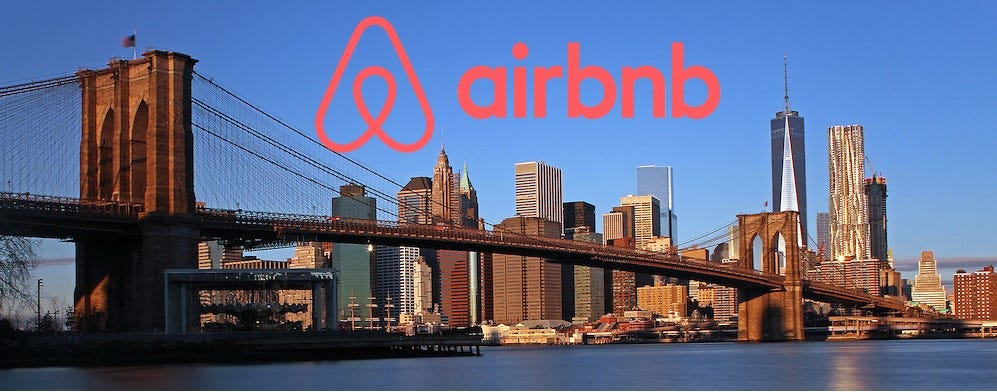

***
**Este projeto foi desenvolvido com o objetivo de explorar e analisar um conjunto de dados fascinante: as informações do AIRBNB em Nova York. A motivação para este trabalho vem do meu entusiasmo por trabalhar com dados e descobrir seus valores, como os que o AIRBNB pode oferecer.**

**Meu foco será realizar um tratamento cuidadoso dos dados para garantir sua qualidade e integridade. Em seguida, aplicar técnicas de regressão linear para identificar o modelo mais eficiente na previsão dos preços dos imóveis no AIRBNB. Esse processo não só nos ajudará a entender melhor quais fatores influenciam os valores dos imóveis, mas também a aprimorar nossas habilidades em análise de dados e modelagem preditiva.**

**Através deste projeto, buscamos não apenas obter um modelo preditivo eficaz, mas também demonstrar a importância do tratamento de dados e da escolha adequada das técnicas de análise para obter resultados precisos e relevantes.**
***

# Análise e tratamento de dados




In [65]:
# Url do banco de dados que usaremos para esse data frame

url ='/content/AB_NYC_2019.csv'

In [66]:
# Importando a biblioteca Pandas

import pandas as pd

In [67]:
# Criando o DataFrame

df = pd.read_csv(url)

In [68]:
# Visualizando o Data Frame

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [69]:
# Conferindo as informações do Data Frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Neste código acima conferimos duas coisas muito importante para o nosso projeto o tipo de dados em cada coluna e se temos ou não valores nulos. Notamos em algumas colunas como **name, host_name,last_review,reviews_per_month** que contém dados nulos.

In [70]:
# Criando uma mascara para visualizar aonde estamos com os valores faltantes

null_mask = df[['name', 'host_name','last_review','reviews_per_month']].isnull()

null_mask

,name,host_name,last_review,reviews_per_month
0,False,False,False,False
1,False,False,False,False
2,False,False,True,True
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
48890,False,False,True,True
48891,False,False,True,True
48892,False,False,True,True
48893,False,False,True,True


In [71]:
# Criando um Data Frame para saber a quantidade da nulos nas colunas

df_null = df[['name', 'host_name','last_review','reviews_per_month']].isnull().sum().reset_index() # Criando o Data Frame
df_null.rename(columns={'index':'Columns',0:'Amount_null'},inplace= True) # Configurando os nomes das colunas
df_null

,Columns,Amount_null
0,name,16
1,host_name,21
2,last_review,10052
3,reviews_per_month,10052


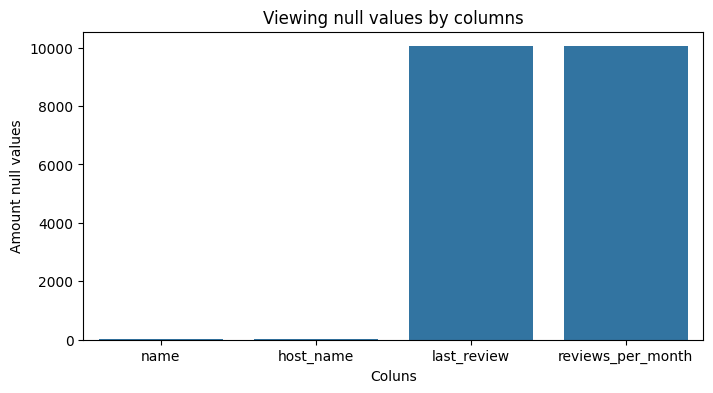

In [72]:
# Visualizando em gráficos os valores nulos

# Importando as bibliotecas necessárias

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.barplot(data = df_null, x='Columns', y='Amount_null')
plt.title('Viewing null values by columns')
plt.xlabel('Coluns')
plt.ylabel('Amount null values')
plt.show()

O que nós já tinhamos notado na Data Frame com a quantidade de valores nulos, confirmamos com o gráfico. Temos muitos valores nulos para as colunas **last_review** e **reviews_per_month**, nas colunas **name** e **host_name** não temos muito valores nulos.

A coluna **reviews_per_month** iremos apagar do nosso Data Frame, pois não o utilizaremos para o nosso projeto e contém muito valores nulos. As colunas **name** e **host_name** não utilizaremos no projeto, mas deixaremos elas por ter poucos valores nulos e pode ser uma forma de "etiquetar" em outras análises.

Já com a coluna **last_review** nós simularemos as datas faltantes com base nas datas que temos em nosso Data Frame. Pois essa coluna será importante no nosso projeto.

In [73]:
df[['last_review','reviews_per_month']]

,last_review,reviews_per_month
0,2018-10-19,0.21
1,2019-05-21,0.38
2,NaN,NaN
3,2019-07-05,4.64
4,2018-11-19,0.10
...,...,...
48890,NaN,NaN
48891,NaN,NaN
48892,NaN,NaN
48893,NaN,NaN


In [74]:
# Apagando a coluna 'reviews_per_month'

df.drop(columns=['reviews_per_month'],inplace=True)

In [75]:
# Conferindo o tipo de dados da coluna 'last_review'

print(df['last_review'].dtype)

object


A coluna 'last_review' por não ser de datatime terá que ser convertido. Temos dois motivos o primeiro é para conseguirmos preencher os valores faltantes com outras datas e o segundo motivo é para análise e previsão de serie temporal.

In [76]:
# Convertendo a coluna para datetime

df['last_review'] = pd.to_datetime(df['last_review'])

In [77]:
# Conferindo se convertemos corretamente

print(df['last_review'].dtype)

datetime64[ns]


In [78]:
# Obtendo os valores únicos, excluindo os NaN

unique_data = df['last_review'].dropna().unique()
print(len(unique_data))

1764


In [79]:
# Preenchendo os valores faltantes da coluna 'last_review'

# Importando a biblioteca necessária
import numpy as np

# Criando uma função para gerar um data entre duas datas

def random_date(start_date, end_date):
  return start_date + pd.to_timedelta(np.random.randint(0,(end_date - start_date).days),unit='D')
    # Irá retnornar o start_date mais um valor aleatório que estará entre 0, start_date e o end_date e formatado para dias

# Função para preencher valores nulos com as datas aleatórias dentro do intervalo

def fillna_with_random(df,column ):
  df_copy = df.copy() # Fazendo uma cópia do data frame original

  # Encontrar o intervalo de datas existentes

  min_date = df_copy[column].min()
  max_date = df_copy[column].max()

  # Preencher os valores auxentes com datas aleatórias dentro do intervalo

  df_copy[column] = df_copy[column].apply(lambda x: random_date(min_date,max_date) if pd.isnull(x) else x)
    # Nesta função lambda irei utilizar o data frame copiado
    # Utilizarei o lambda para pegar o x aleatório entre a data mínima e máxima
    # A data aleatório substituio valor nulo, se o valor não for nulo ele permanecerá inalterado

  return df_copy # Retornar a função

In [80]:
# Aplicando a função fillna_with_random no nosso data frame original

df = fillna_with_random(df,'last_review') # Para essa função primeiro passamos o Data Frame e depois a coluna que iremos alterar

Eu tentei preencher os dados vazios da coluna **last_review** com **bfill** e depois com **ffill**.

Porém com o **bfill** que preenche o dado faltante com a data anterior ainda tive como resultado de 42 dados faltantes.
E utilizando **ffill** para preencer o dado faltante com a data posterior tive como resultado muitos dados repetidos.

Portanto a melhor forma que eu encontrei foi fazer o preenchimento de dados faltantes de uma forma aleatória. Utilizei o maior e a menor data para criar um intervalo e coloquei de forma aleatória para utilizar esse intervalo para preencher os dados

In [81]:
# Conferindo se todos os dados nulosda coluna last_review foram tratados

df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [82]:
# Conferindo a repetição entre os dados da coluna last_review

unique_data_1 = df['last_review'].unique() # Criando um array da coluna last_review apenas com os valores unicos dela
print(len(unique_data_1))

2981


***
Valores unicos na coluna last_review antes do tratamento: 1764

Valores unicos na coluna last_review depois do tratamento: 2981
***

Essa diferença é um ótimo resultado para nós, isso mostra que inserimos valores únicos e não preenchemos os dados nulos com repetições

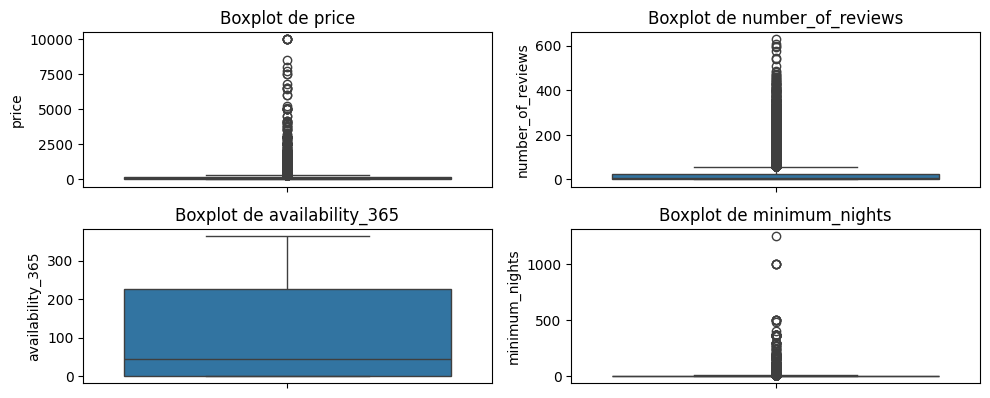

In [83]:
# Conferindo se possuimos outliers

# Visualizando os dados com boxplot para indentificar possíveis outliers

plt.figure(figsize=(10,6)) # Configurando o tamanho do gráfico

# Escolhendo as colunas que iremos conferir os outliers

columns_to_check = ['price','number_of_reviews','availability_365','minimum_nights']

# Iterando para plotar os boxplots

for i, column in enumerate (columns_to_check,1):
  plt.subplot(3,2,i) # Criando os sub gráficos
  sns.boxplot(y=df[column]) # Colocando a coluna para o boxplot
  plt.title(f'Boxplot de {column}') # Configurando o título

plt.tight_layout() # Para nenhum gráfico invadir o espaço do outro
plt.show()

In [84]:
df.price.unique()

array([  149,   225,   150,    89,    80,   200,    60,    79,   135,
          85,   120,   140,   215,    99,   190,   299,   130,   110,
          44,   180,    50,    52,    55,    70,    35,    40,    68,
         115,   151,   228,   144,    69,    49,   375,   250,   275,
         230,    51,    65,   105,    95,   145,   285,    94,   800,
         131,    98,   100,   125,   175,   500,   101,   220,    59,
         350,   199,   325,   235,   170,   400,    75,    90,   185,
          77,    76,   160,   195,   156,   219,   475,   165,   196,
          83,   123,   265,   249,   121,    45,    71,    64,   159,
         189,   239,   305,   155,    92,    36,    37,   205,    39,
         390,   129,   212,   124,   122,   109,   575,   229,   169,
         113,   179,   349,   139,   650,    67,   599,   211,   290,
          87,   395,   260,    97,   132,   141,   495,   259,    96,
         295,   451,   300,    42,   255,    72,    88,   450,   198,
          46,    33,

In [85]:
df.number_of_reviews.unique()

array([  9,  45,   0, 270,  74,  49, 430, 118, 160,  53, 188, 167, 113,
        27, 148, 198, 260, 130,  39,  71,  88,  19,  58, 108,  29, 242,
       197, 273, 168, 231, 214, 245,  15,  25,  81,  97,  11, 248,  61,
       135, 112,  73,  82, 328, 105, 289, 138,  21,  42,   5,  66, 143,
       191,   4, 338, 106, 190,  23, 142,  54,  70,  16,  94, 194,   2,
       174,  24, 166,   1,  30, 139, 233,  68,  46, 335, 162, 170, 334,
        12, 467,   7,  38, 324, 115, 354, 195,  13,  36,  63, 155, 193,
        32,  50,  26, 426, 227,  84,   3,  10, 124, 240, 200,  79,  34,
       134, 126, 234, 202,  28, 309,  14,  80, 294, 150,  47, 219, 114,
       213,  86,  18, 206, 122,  33,  52,  51, 199,  41, 109, 151, 285,
       375,   6, 358, 226, 104, 204, 253, 129,  37,  69, 192,  17, 222,
       205, 458, 183, 189, 127,  35, 171,  92, 238,  56, 111, 147, 177,
       185,  62, 181, 333, 441, 279, 203, 210,  64, 132,  20,  67, 187,
        22,  93,  48, 120,  43,  59,  31, 220, 286, 398,  76, 18

In [86]:
df.minimum_nights.unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36])

Faremos alguns gráficos para conferirmos o comportamento das variáveis e também utilizaremos estatística descritiva para confirmarmos a presença de outliers

In [87]:
# Estastística descritiva

price_stats = df['price'].describe()
review_stats = df['number_of_reviews'].describe()
nights_stats = df['minimum_nights'].describe()


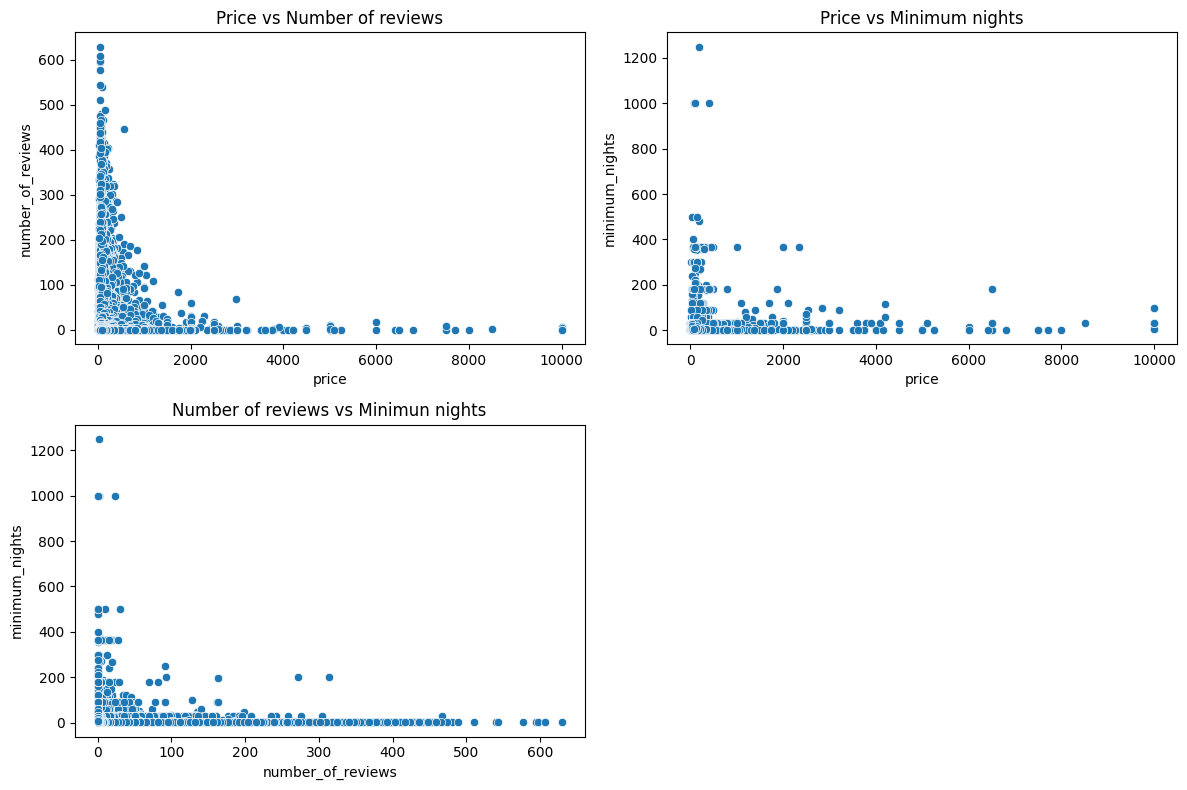

In [88]:
# Plotando gráfico para conferir a relação entre as variáveis

plt.figure(figsize=(12,8)) # Tamanho do gráfico

plt.subplot(2,2,1) # Dividindo o espaço para o gráfico
sns.scatterplot(x=df['price'],y=df['number_of_reviews']) # Colocando as variáveis para esse gráfico
plt.title('Price vs Number of reviews') # Título do gráfico

plt.subplot(2,2,2)
sns.scatterplot(x=df['price'],y=df['minimum_nights'])
plt.title('Price vs Minimum nights')


plt.subplot(2,2,3)
sns.scatterplot(x=df['number_of_reviews'], y = df['minimum_nights'])
plt.title('Number of reviews vs Minimun nights')

plt.tight_layout() # Para nenhum gráfico oculpar o lugar do outro
plt.show() # Mostrar o gráfico

Com o auxilio desse gráfico podemos ter certeza que são outliers, pois não há um crescimento junto.

Outro fator é que existem casas com preço igual a zero ou muito proximo e com muitas avaliações, por exemplo.  

***

Variável price

In [89]:
print(f'Estatística de preço:\n{price_stats}')

Estatística de preço:
count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


**Análise de Preço**

*Distribuição do Preço:*

Média (Mean): O preço médio dos imóveis é 152,72, o que fornece uma noção geral do custo médio.

Desvio Padrão (Std): O alto desvio padrão de 240,15 indica que há uma grande variação nos preços dos imóveis.

Valores Extremos: O preço mínimo é 0 e o máximo é 10.000, sugerindo a presença de valores discrepantes (outliers).

Quartis: O preço mediano (50º percentil) é 106, que é menor que a média, o que pode sugerir uma distribuição de preços assimétrica, com a maioria dos preços abaixo da média.

***

Variável number_of_reviews

In [90]:
print(f'Estatística do Número de Avaliações:\n{review_stats}')

Estatística do Número de Avaliações:
count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64


**Análise do Número de Avaliações**
*Distribuição das Avaliações:*

Média (Mean): A média de avaliações é 23,27, mas o desvio padrão é 44,55, indicando que a maioria dos imóveis tem um número de avaliações muito menor que a média.

Quartis: A mediana é 5, o que sugere que metade dos imóveis tem 5 ou menos avaliações. A presença de um valor máximo de 629 indica que alguns imóveis têm um número muito alto de avaliações.

***

Variável minimum_nights

In [91]:
print(f'Estatística de Noites Mínimas:\n{nights_stats}')

Estatística de Noites Mínimas:
count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


**Análise das Noites Mínimas**

*Distribuição das Noites Mínimas:*

Média (Mean): A média é 7,03, mas o desvio padrão é 20,51, sugerindo que há uma grande variação no número de noites mínimas exigidas.

Quartis: A mediana é 3, o que indica que metade dos imóveis exige 3 ou menos noites mínimas. O valor máximo de 1250 sugere a presença de algumas regras extremamente restritivas.

***

Confirmamos a presença de outliers através de visualização gráfica e estatística descritiva.
Agora nosso próximo será de trata-los

Usaremos uma técnica chamada **Capping**, que é limitarmos os valores extremos aos limites superiores e inferiores.

Assim não perderemos informações importante

In [92]:
# Aplicando Capping para os outliers

def cap_outliers(df,column):
  Q1 = df[column].quantile(.25) # Primeiro quartil
  Q3 = df[column].quantile(.75) # Terceiro quartil

  IQR = Q3 -Q1 # Diferença entre o primeiro e terceiro quartil

  lower_bound = Q1 - 1.5 * IQR # Valor mínimo antes de ser outlier
  upper_bound = Q3 + 1.5 * IQR # Valor máximo antes de ser outlier

  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column]) # Encontrando valores menores que o permitido e substituindo pelos mínimos permitido
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column]) # Encontrando valores maiores que o permitido e substituindo pelos máximos permitido

  return df # Retornar a função

In [93]:
# Criando uma lista com as colunas para as alterações

columns_to_cap = ['price','number_of_reviews','minimum_nights']

In [94]:
# Aplicando a função

df = cap_outliers(df, columns_to_cap)

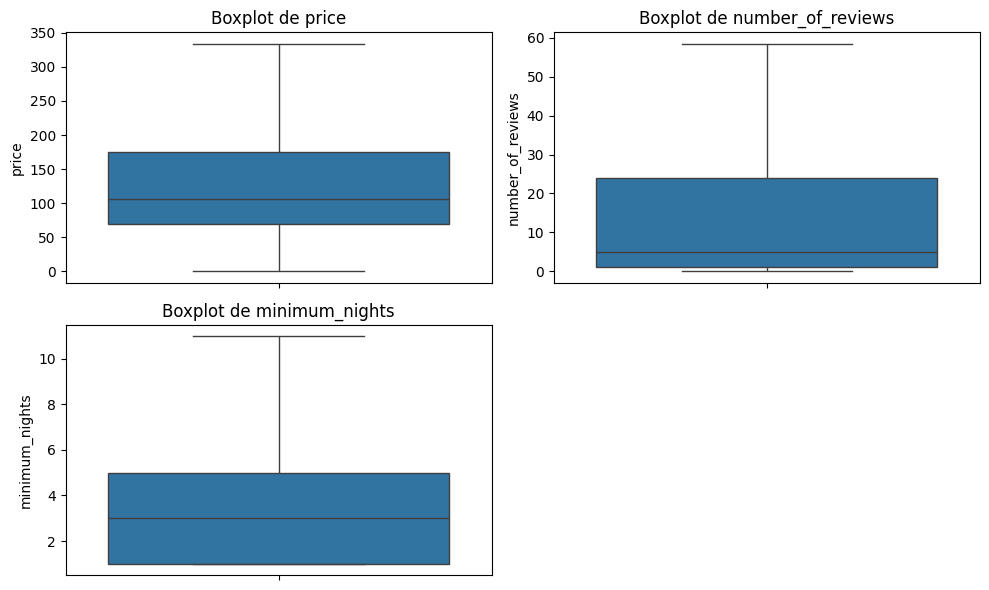

In [95]:
# Conferindo se os outliers persistem

# Visualizando os dados com boxplot para indentificar possíveis outliers

plt.figure(figsize=(10,6)) # Configurando o tamanho do gráfico

# Escolhendo as colunas que iremos conferir os outliers

columns_to_check = ['price','number_of_reviews','minimum_nights']

# Iterando para plotar os boxplots

for i, column in enumerate (columns_to_check,1):
  plt.subplot(2,2,i) # Criando os sub gráficos
  sns.boxplot(y=df[column]) # Colocando a coluna para o boxplot
  plt.title(f'Boxplot de {column}') # Configurando o título

plt.tight_layout() # Para nenhum gráfico invadir o espaço do outro
plt.show()

Agora podemos seguir mais tranquilos com outliers tratados.

Falta apenas mais um passo para o tratamento de dados, que é a técnica **One-Hot Encoding** que consiste em transformar variáveis categoricas em binárias.

In [96]:
# Aplicando o One_hot Encoding

df_one_hot = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'])
# Criei outro data frame para ter mais segurança se precisarmos das colunas no outro formato


In [97]:
# Visualizando o novo data frame

df_one_hot.head()

,id,name,host_id,host_name,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,40.64749,-73.97237,149.0,1.0,9.0,2018-10-19,...,False,False,False,False,False,False,False,False,True,False
1,2595,Skylit Midtown Castle,2845,Jennifer,40.75362,-73.98377,225.0,1.0,45.0,2019-05-21,...,False,False,False,False,False,False,False,True,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,40.80902,-73.94190,150.0,3.0,0.0,2012-11-01,...,False,False,False,False,False,False,False,False,True,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,40.68514,-73.95976,89.0,1.0,58.5,2019-07-05,...,False,False,False,False,False,False,False,True,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,40.79851,-73.94399,80.0,10.0,9.0,2018-11-19,...,False,False,False,False,False,False,False,True,False,False


Como foi criado muitas colunas ao usar a técnica de One-Hot Encoding, para diminuir a alta dimensionalidade e eficiência computacional.

Irei excluir as colunas derivadas da variável **neighbourhood**. Para isso eu usarei um filtro em relação as colunas que começam com esse nome, pois usando **get_dummies** mantém o nome original diferenciando no restante dele

In [98]:
# Filtrando as colunas que começam com neighbourhood

neighbourhood_cols = df_one_hot.filter(like='neighbourhood_').columns

# Filtrando as colunas que começam com neighbourhood mas não é para apagar, pois se refere a coluna neighbourhood_group

cols_to_drop = [col for col in neighbourhood_cols if 'neighbourhood_group' not in col]
    # Vamos iterar sobre cada coluna que contém 'neighbourhood_' no nome e,
    # se a coluna não estiver relacionada ao 'neighbourhood_group', ela será adicionada à lista 'cols_to_drop',
    # que será usada para eliminar essas colunas permanentemente do data frame


cols_to_drop

['neighbourhood_Allerton',
 'neighbourhood_Arden Heights',
 'neighbourhood_Arrochar',
 'neighbourhood_Arverne',
 'neighbourhood_Astoria',
 'neighbourhood_Bath Beach',
 'neighbourhood_Battery Park City',
 'neighbourhood_Bay Ridge',
 'neighbourhood_Bay Terrace',
 'neighbourhood_Bay Terrace, Staten Island',
 'neighbourhood_Baychester',
 'neighbourhood_Bayside',
 'neighbourhood_Bayswater',
 'neighbourhood_Bedford-Stuyvesant',
 'neighbourhood_Belle Harbor',
 'neighbourhood_Bellerose',
 'neighbourhood_Belmont',
 'neighbourhood_Bensonhurst',
 'neighbourhood_Bergen Beach',
 'neighbourhood_Boerum Hill',
 'neighbourhood_Borough Park',
 'neighbourhood_Breezy Point',
 'neighbourhood_Briarwood',
 'neighbourhood_Brighton Beach',
 'neighbourhood_Bronxdale',
 'neighbourhood_Brooklyn Heights',
 'neighbourhood_Brownsville',
 "neighbourhood_Bull's Head",
 'neighbourhood_Bushwick',
 'neighbourhood_Cambria Heights',
 'neighbourhood_Canarsie',
 'neighbourhood_Carroll Gardens',
 'neighbourhood_Castle Hill',


In [99]:
# Eliminando essas colunas do data frame

df_one_hot.drop(columns=cols_to_drop,inplace=True)

In [100]:
# Visualizando o data frame

df_one_hot.head()

,id,name,host_id,host_name,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,40.64749,-73.97237,149.0,1.0,9.0,2018-10-19,6,365,False,True,False,False,False,False,True,False
1,2595,Skylit Midtown Castle,2845,Jennifer,40.75362,-73.98377,225.0,1.0,45.0,2019-05-21,2,355,False,False,True,False,False,True,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,40.80902,-73.94190,150.0,3.0,0.0,2012-11-01,1,365,False,False,True,False,False,False,True,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,40.68514,-73.95976,89.0,1.0,58.5,2019-07-05,1,194,False,True,False,False,False,True,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,40.79851,-73.94399,80.0,10.0,9.0,2018-11-19,1,0,False,False,True,False,False,True,False,False


In [101]:
# Conferindo a quantidade de colunas

len(df_one_hot.columns)

20

Depois desse tratamento diminuimos o número de colunas de **241** para **20**

***
Agora com os dados tratados podemos fazer **Regressão Linear** e **predição de séries temporais**
***

# Regressão Linear

**Objetivo será identificar as variáveis com a melhor relação com a variável `price`**

In [102]:
# Criando uma Data Frame para o projeto de regressão

regression_df = df_one_hot.copy()

In [103]:
# Visualizando o Data Frame, para saber quais colunas serão úteis neste momento

regression_df.head()

,id,name,host_id,host_name,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,40.64749,-73.97237,149.0,1.0,9.0,2018-10-19,6,365,False,True,False,False,False,False,True,False
1,2595,Skylit Midtown Castle,2845,Jennifer,40.75362,-73.98377,225.0,1.0,45.0,2019-05-21,2,355,False,False,True,False,False,True,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,40.80902,-73.94190,150.0,3.0,0.0,2012-11-01,1,365,False,False,True,False,False,False,True,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,40.68514,-73.95976,89.0,1.0,58.5,2019-07-05,1,194,False,True,False,False,False,True,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,40.79851,-73.94399,80.0,10.0,9.0,2018-11-19,1,0,False,False,True,False,False,True,False,False


In [104]:
# Dados que não serão úteis neste projeto

regression_df.drop(columns=['id','name','host_name','host_id'],inplace=True)

In [105]:
# Confirmando as informações do Data Frame para podermos dár prosseguimento no projeto

regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   latitude                           48895 non-null  float64       
 1   longitude                          48895 non-null  float64       
 2   price                              48895 non-null  float64       
 3   minimum_nights                     48895 non-null  float64       
 4   number_of_reviews                  48895 non-null  float64       
 5   last_review                        48895 non-null  datetime64[ns]
 6   calculated_host_listings_count     48895 non-null  int64         
 7   availability_365                   48895 non-null  int64         
 8   neighbourhood_group_Bronx          48895 non-null  bool          
 9   neighbourhood_group_Brooklyn       48895 non-null  bool          
 10  neighbourhood_group_Manhattan     

In [106]:
# Excluirei as colunas latitude e longitude, pois são duas colunas muito específicas e de difíl interpretação

regression_df.drop(columns=['latitude','longitude'],inplace=True)

Com as colunas necessárias, em formatos corretos e sem dados nulos podemos progredir no projeto

In [107]:
#  Correlação entre as variáveis

corr = regression_df.corr()
corr

,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
price,1.000000,0.053365,-0.066363,-0.063783,0.162565,0.112730,-0.091649,-0.194636,0.338258,-0.172471,-0.040406,0.588101,-0.550827,-0.127794
minimum_nights,0.053365,1.000000,-0.210292,-0.141064,0.235167,0.156883,-0.049473,-0.038368,0.106266,-0.076530,-0.024198,0.158882,-0.149464,-0.032390
number_of_reviews,-0.066363,-0.210292,1.000000,0.439628,-0.100799,0.191100,0.021768,0.025513,-0.065793,0.045661,0.026412,-0.001734,0.009264,-0.024630
last_review,-0.063783,-0.141064,0.439628,1.000000,-0.063323,0.159995,0.024216,0.032237,-0.072490,0.045769,0.022068,0.004173,-0.001456,-0.008934
calculated_host_listings_count,0.162565,0.235167,-0.100799,-0.063323,1.000000,0.225701,-0.022511,-0.123234,0.152842,-0.033881,-0.012838,0.112193,-0.108945,-0.011737
availability_365,0.112730,0.156883,0.191100,0.159995,0.225701,1.000000,0.060806,-0.079671,-0.005434,0.087113,0.057885,-0.006804,-0.010986,0.058294
neighbourhood_group_Bronx,-0.091649,-0.049473,0.021768,0.024216,-0.022511,0.060806,1.000000,-0.126239,-0.134730,-0.054693,-0.013245,-0.052092,0.042765,0.031041
neighbourhood_group_Brooklyn,-0.194636,-0.038368,0.025513,0.032237,-0.123234,-0.079671,-0.126239,1.000000,-0.745240,-0.302527,-0.073265,-0.073905,0.079464,-0.017467
neighbourhood_group_Manhattan,0.338258,0.106266,-0.065793,-0.072490,0.152842,-0.005434,-0.134730,-0.745240,1.000000,-0.322875,-0.078193,0.160082,-0.157762,-0.009169
neighbourhood_group_Queens,-0.172471,-0.076530,0.045661,0.045769,-0.033881,0.087113,-0.054693,-0.302527,-0.322875,1.000000,-0.031742,-0.108505,0.100676,0.026693


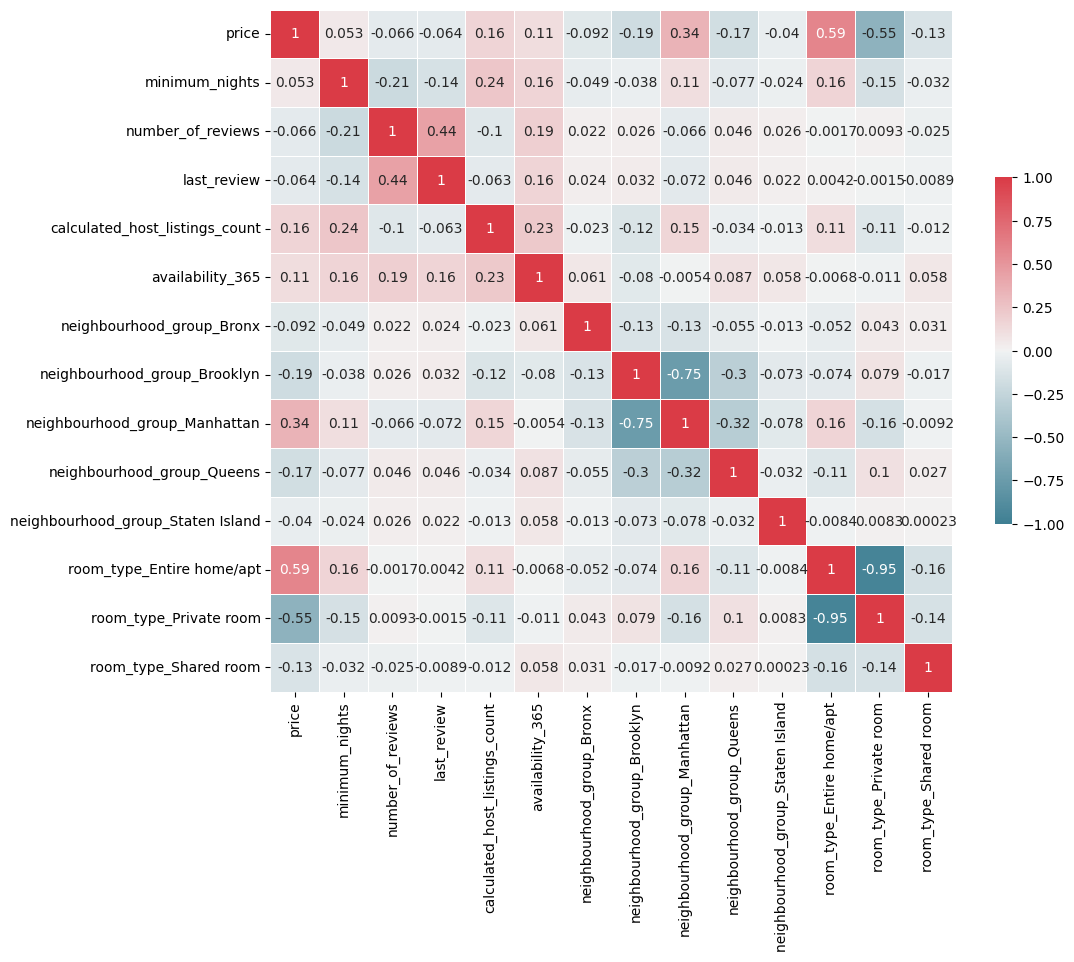

In [108]:
# Apresentando a correlação em gráfico para facilitar a visualização

# Importando as bibliotecas necessárias

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando a figura do matplotlib

f,ax = plt.subplots(figsize=(11,9))

# Gerando o mapa de calor

cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr, cmap = cmap,
            vmax=1, vmin=-1, center=0, square=True, linewidths = .5, annot = True,
            cbar_kws={'shrink':.5})

# Exibir o mapa de calor(heatmap)

plt.show()

In [109]:
# Correlação das demais variáveis em relação com a variável price

price_corr = corr[['price']].sort_values(by='price', ascending = False)
price_corr.rename(columns={'price':'correlation'},inplace = True) # Alterando o nome da coluna
price_corr.drop(index='price',inplace=True) # Retirando a linha price que obviamente será 1


In [110]:
# Conferindo o data frame

price_corr

,correlation
room_type_Entire home/apt,0.588101
neighbourhood_group_Manhattan,0.338258
calculated_host_listings_count,0.162565
availability_365,0.112730
minimum_nights,0.053365
neighbourhood_group_Staten Island,-0.040406
last_review,-0.063783
number_of_reviews,-0.066363
neighbourhood_group_Bronx,-0.091649
room_type_Shared room,-0.127794


Neste estudo de correlação notamos que as varáveis que possuem uma correlação positiva com a variável de estudo são as variáveis:


  *   **room_type_Entire home/apt**;
  *   **neighbourhood_group_Manhattan**;
  *   **calculated_host_listings_count**;
  *   **availability_365**;
  *   **minimum_nights**


***


**Explicando as variáveis:**



1.   **room_type_Entire home/apt** -> Esta variável indica se o imóvel é uma casa inteira ou um apartamento. Geralmente, imóveis inteiros tendem a ter um preço mais alto comparado a quartos compartilhados ou privados. Isso se deve ao fato de que a privacidade e o espaço adicional proporcionados por um imóvel inteiro são frequentemente valorizados mais pelos hóspedes, resultando em um preço mais elevado. Correlação de **0.58**
2.   **neighbourhood_group_Manhattan** -> Esta variável indica se o imóvel está localizado no bairro de Manhattan. A presença em Manhattan está associada a preços mais altos devido ao alto custo de vida e à demanda significativa por acomodações nesta área central de Nova York. Correlação de **0.33**
3.   **calculated_host_listings_count** ->Esta variável reflete o número de listagens que um anfitrião possui. Um número maior de listagens pode estar associado a uma maior experiência e reputação do anfitrião, o que pode contribuir para um aumento no preço. No entanto, o impacto exato dessa variável no preço pode variar dependendo de outros fatores, como a qualidade das listagens e a demanda geral. Correlação de **0.16**
4.   **availability_365** ->Esta variável representa o número de dias disponíveis no ano para o imóvel. Imóveis com alta disponibilidade podem ser mais flexíveis em termos de reservas, o que pode influenciar o preço. A relação positiva indica que uma maior disponibilidade está associada a preços mais altos. Correlação de **0.11**
5.   **minimum_nights** -> Esta variável define o número mínimo de noites que um hóspede deve reservar. A correlação com o preço é relativamente baixa, indicando que a exigência de um número mínimo de noites não tem uma relação forte com o preço. Correlação de **0.053**








***
As três varáveis com as melhores correlações:

  *   **room_type_Entire home/apt**;
  *   **neighbourhood_group_Manhattan**;
  *   **calculated_host_listings_count**
***

Agora vamos conferir as correlações com testes

Para utilizarmos os algoritimos de Machine Learning precisamos das variáveis em numericas


In [111]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   price                              48895 non-null  float64       
 1   minimum_nights                     48895 non-null  float64       
 2   number_of_reviews                  48895 non-null  float64       
 3   last_review                        48895 non-null  datetime64[ns]
 4   calculated_host_listings_count     48895 non-null  int64         
 5   availability_365                   48895 non-null  int64         
 6   neighbourhood_group_Bronx          48895 non-null  bool          
 7   neighbourhood_group_Brooklyn       48895 non-null  bool          
 8   neighbourhood_group_Manhattan      48895 non-null  bool          
 9   neighbourhood_group_Queens         48895 non-null  bool          
 10  neighbourhood_group_Staten Island 

In [112]:
# Transformando as colunas bools em int
bools_cols = ['neighbourhood_group_Bronx','neighbourhood_group_Brooklyn','neighbourhood_group_Manhattan','neighbourhood_group_Queens','neighbourhood_group_Staten Island','room_type_Entire home/apt','room_type_Private room','room_type_Shared room']

# Fazendo a conversão

regression_df[bools_cols] = regression_df[bools_cols].astype(int)

In [113]:
# Confirmando as conversões

regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   price                              48895 non-null  float64       
 1   minimum_nights                     48895 non-null  float64       
 2   number_of_reviews                  48895 non-null  float64       
 3   last_review                        48895 non-null  datetime64[ns]
 4   calculated_host_listings_count     48895 non-null  int64         
 5   availability_365                   48895 non-null  int64         
 6   neighbourhood_group_Bronx          48895 non-null  int64         
 7   neighbourhood_group_Brooklyn       48895 non-null  int64         
 8   neighbourhood_group_Manhattan      48895 non-null  int64         
 9   neighbourhood_group_Queens         48895 non-null  int64         
 10  neighbourhood_group_Staten Island 

Os valores booleanos da coluna foram convertidos para valores numéricos, onde False foi mapeado para 0 e True para 1. Essa conversão foi necessária para que a variável pudesse ser utilizada adequadamente nos algoritmos de Machine Learning, que requerem entradas numéricas

***
Substituindo os espaços e caracteres por underlines para não haver nenhum erro de interpretação pelo algoritmo

In [114]:
# Substituindo espaços por underlines em todos os nomes das colunas
regression_df.columns = regression_df.columns.str.replace('/', '_').str.replace(' ', '_')

In [115]:
# Importando train_test_split

from sklearn.model_selection import train_test_split

In [116]:
# Definindo Y e X

y = regression_df['price']
x = regression_df.drop(columns=['price'])

In [117]:
# Aplicando o split do y e x, dividindo treino e teste

X_train, X_test, Y_train, Y_test = train_test_split(x,y,
                                                    test_size=0.3,
                                                    random_state=23)

In [118]:
# Dados de treino para usar

df_train = pd.DataFrame(data=X_train)
df_train['price'] = Y_train

In [119]:
# Visualizando novo dataframe com dados de treino

df_train.head()

,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten_Island,room_type_Entire_home_apt,room_type_Private_room,room_type_Shared_room,price
32982,1.0,7.0,2019-06-19,1,0,0,0,1,0,0,0,1,0,75.0
21265,2.0,23.0,2019-06-23,1,3,0,1,0,0,0,1,0,0,148.0
32737,2.0,15.0,2019-05-27,1,3,0,1,0,0,0,0,1,0,95.0
24871,6.0,0.0,2015-11-01,1,0,0,1,0,0,0,1,0,0,160.0
43241,1.0,0.0,2017-12-15,1,0,0,1,0,0,0,1,0,0,125.0


Utilizaremos o módulo OLS:

O módulo ols (Ordinary Least Squares) é uma técnica de regressão linear que ajusta uma linha reta aos dados minimizando a soma dos quadrados das diferenças entre os valores observados e os valores previstos

In [120]:
# Import ols

from statsmodels.formula.api import ols

In [121]:
#  Ajustando o primeiro modelo, onde utilizaremos apenas a variável com melhor correlação

model_0 = ols('price ~ room_type_Entire_home_apt',data= df_train).fit() # Passamos primeiro a relação que desejamos

Para saber o efeito de ser uma apartamento inteiro ou não no preço da casa, precisamos avaliar e interpretar os parâmetros da regressão linear

In [122]:
# Visualizando os parâmetros

model_0.params

,0
Intercept,81.783659
room_type_Entire_home_apt,98.726143


***

**Interpretação:**

**1. room_type_Entire_home_apt|98.726143:**

 Se o tipo de quarto for um "apartamento inteiro" em vez de um quarto compartilhado, o valor médio do imóvel aumenta em $98.72. O valor positivo indica uma relação positiva: quanto mais provável for o imóvel ser um apartamento inteiro, maior tende a ser o valor do imóvel.

**2. Intercept|81.783659:**

 O valor de $81.78 é o valor estimado do imóvel quando o tipo de quarto não é um "apartamento inteiro" (ou seja, quando a variável room_type_Entire_home_apt é 0). Em outras palavras, é o valor base do imóvel quando o tipo de quarto é algo diferente de um apartamento inteiro.

In [123]:
# Resumo do nosso modelo/
# Conferindo a significancia dessa variavel independente com a variavel resposta

print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                 1.818e+04
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:30:28   Log-Likelihood:            -1.9282e+05
No. Observations:               34226   AIC:                         3.857e+05
Df Residuals:                   34224   BIC:                         3.857e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

**Quando o observamos o p_valor significativamente baixo, podemos dizer que a variável independente tem um efeito significativo em relação a variável resposta**

In [124]:
# Interpretando R² para sabermos as explicabilidade do nosso modelo

print(f'R² -> {model_0.rsquared}')

R² -> 0.3468824049051087


Podemos interpretar que 34% do preço das casas é explicado por ser apartamento inteiro ou não

***
Interpretando os residuos(Residuos -> a diferença da predição para o valor real):

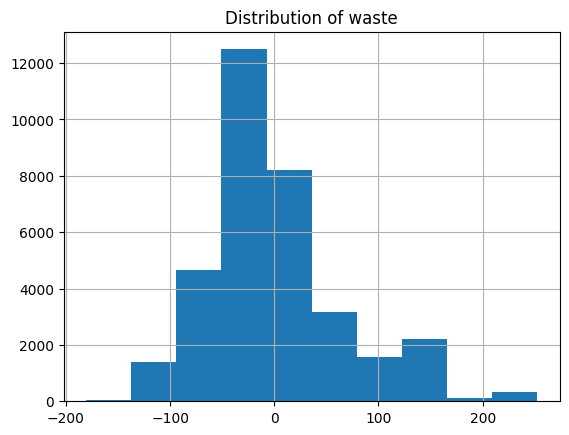

In [125]:
model_0.resid.hist()
plt.title('Distribution of waste')
plt.show()

Melhores residuos são os perto de ZERO, portando estamos com muitos residuos

Obtendo o R² da previsão

In [126]:
# Importando o R² score

from sklearn.metrics import r2_score

In [129]:
# Definindo o Y da previsão

Y_predict = model_0.predict(X_test)


In [130]:
# Printando o R²

print(f'R² -> {r2_score(Y_test,Y_predict)}')

R² -> 0.3434167744321316


O R² Do treino e da previsão dever ser parecidos, estão performando de uma forma igual.

**Basicamente 34% do preço previsão é explicado pela variável room_type_Entire_home_apt**

***
Os outros 66% são explicados por outros fatores
***

O modelo com apenas um fator nos mostrou um R² de 0.34, ou seja, aproximadamente 34% da variação observada no preços podem ser explicada pela variação de ser um apartamento inteiro ou não. Isso indica que ainda há uma quantidade significativa de variação que não está sendo capturada por esse modelo específico. Vamos analisar outros fatores para explicar o preços

Vamos fazer mais três modelos, um com todas as variáveis e outra com as 5 variáveis, a outra com as 4 melhores variáveis retirando a coluna room_type_Entire_home_apt.
Para entendermos qual é o melhor modelo

***
Vamos adicionar uma variável constante.

Pois a constante 𝛽0 representa o valor de 𝑌 quando todas as variáveis independentes são zero. Sem adicionar uma constante, o modelo assume que o intercepto é zero, o que pode não refletir a realidade dos dados e pode levar a um ajuste inadequado
***




In [131]:
# Importando a api do statsmodels para adcionarmos a constante

import statsmodels.api as sm

In [132]:
# Adicioandno a constante

X_train = sm.add_constant(X_train)

In [133]:
# Visualizando o data frame

X_train

,const,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten_Island,room_type_Entire_home_apt,room_type_Private_room,room_type_Shared_room
32982,1.0,1.0,7.0,2019-06-19,1,0,0,0,1,0,0,0,1,0
21265,1.0,2.0,23.0,2019-06-23,1,3,0,1,0,0,0,1,0,0
32737,1.0,2.0,15.0,2019-05-27,1,3,0,1,0,0,0,0,1,0
24871,1.0,6.0,0.0,2015-11-01,1,0,0,1,0,0,0,1,0,0
43241,1.0,1.0,0.0,2017-12-15,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,1.0,1.0,58.5,2019-06-16,1,290,0,1,0,0,0,1,0,0
11190,1.0,1.0,0.0,2016-08-13,1,0,0,1,0,0,0,0,1,0
26569,1.0,11.0,4.0,2019-05-24,25,281,0,0,1,0,0,1,0,0
9256,1.0,2.0,58.5,2019-07-01,1,14,0,1,0,0,0,0,1,0


Excluindo a coluna last_review. Por dois motivos, o formato em data não é bom para algoritmo de regressão.

Outro motivo é que eu não farei a conversão pois é uma variavel que não auxilia muito explicar a variável resposta


In [134]:
# Apagando a variável

X_train.drop(columns=['last_review'],inplace=True)

In [135]:
# Criando o modelo com todas as variáveis menos a last_review

all_cols_model = sm.OLS(Y_train, X_train).fit()

In [136]:
# Criando o modelo com as 4 melhores variáveis retirando a variável room_type_Entire home/apt
four_cols_model = sm.OLS(Y_train,
                         X_train[['const',
                                  'neighbourhood_group_Manhattan','calculated_host_listings_count',
                                  'availability_365','minimum_nights']]).fit()

In [137]:
# Criando o modelo com as 5 melhores variáveis

five_cols_model = sm.OLS(Y_train,
                         X_train[['const',
                                   'room_type_Entire_home_apt','neighbourhood_group_Manhattan',
                                  'calculated_host_listings_count','availability_365',
                                  'minimum_nights']]).fit()

***
Vamos conferir o resumo dos modelos
***

In [138]:
# Resumo do modelo com todas as colunas

print(all_cols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     2768.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:31:18   Log-Likelihood:            -1.8997e+05
No. Observations:               34226   AIC:                         3.800e+05
Df Residuals:                   34215   BIC:                         3.801e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [139]:
# Resumo do modelo com as 4 melhores variáveis

print(four_cols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     1313.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:31:18   Log-Likelihood:            -1.9767e+05
No. Observations:               34226   AIC:                         3.954e+05
Df Residuals:                   34221   BIC:                         3.954e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [140]:
# Resumo do modelo com as 5 melhores variáveis

print(five_cols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     5180.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:31:18   Log-Likelihood:            -1.9047e+05
No. Observations:               34226   AIC:                         3.810e+05
Df Residuals:                   34220   BIC:                         3.810e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

***
**`1. all_cols_model:`**


*   R-squared: 0.447
*   Adj. R-squared: 0.447
*   P-value: Baixo
*   A menor autovalor é 5.73e-28








**Análise:**

R-squared de 0.447 indica que cerca de 44.7% da variação na variável dependente price é explicada por esse modelo.

P-value baixo sugere que as variáveis no modelo são estatisticamente significativas.

A mensagem sobre a menor autovalor (5.73e-28) sugere um problema sério de multicolinearidade ou que a matriz de design é singular. Isso significa que algumas variáveis independentes podem estar fortemente correlacionadas, causando instabilidade nos coeficientes estimados.

*Conclusão:* Apesar de um R-squared razoável, a forte multicolinearidade é uma preocupação. Talvez seja necessário remover ou combinar variáveis para resolver esse problema.

***
**`2. four_cols_model:`**


*   R-squared: 0.133
*   Adj. R-squared: 0.133
*   P-value: Baixo


**Análise:**


R-squared de 0.133 indica que apenas 13.3% da variação em price é explicada pelo modelo. Este valor é relativamente baixo, sugerindo que o modelo não captura bem a variabilidade dos dados.


P-value baixo indica que as variáveis no modelo são significativas, mas isso não é suficiente para compensar o baixo R-squared.

Conclusão: Este modelo parece subajustar os dados. Pode não ser uma boa opção, pois não explica bem a variabilidade da variável price.

***

**`3. five_cols_model:`**

*   R-squared: 0.431
*   Adj. R-squared: 0.431
*   P-value: Baixo


**Análise:**


R-squared de 0.431 mostra que cerca de 43.1% da variação em price é explicada por esse modelo. Isso é similar ao all_cols_model e indica que o modelo é relativamente bom.


P-value baixo indica que as variáveis do modelo são estatisticamente significativas.


Conclusão: Este modelo oferece uma boa explicação da variabilidade da variável dependente e pode ser uma escolha robusta, especialmente por ele não sofrer dos problemas de multicolinearidade encontrados no *all_cols_model*
***

